<a href="https://colab.research.google.com/github/brumenezes/N2-eletiva/blob/main/N2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a rel="license" href="https://faculdadesalvadorarena.org.br/"><img alt="FESA" style="border-width:0" src="https://faculdadesalvadorarena.org.br/wp-content/uploads/2022/07/logo_fesa.png" /></a><br />
**FESA - Eletiva II (2025.1)** <br/>

Alunos(a): Felipe Marques Lourenço Rodrigues

Bruna Menezes

Luan Felix

Everton Lima

 <br/>
Data:
05/04/2025 <br/>

#Questão 1

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [7]:
# Carregar os dados
movies = pd.read_csv("movies.csv")

In [8]:
ratings = pd.read_csv("ratings.csv")

In [9]:
tags = pd.read_csv("tags.csv")

In [10]:
links = pd.read_csv("links.csv")

In [11]:
# Extraindo o ano do filme
def extract_year(title):
    if "(" in title and ")" in title:
        return title.strip().split("(")[-1].replace(")", "").strip()
    return None

In [12]:
movies["year"] = movies["title"].apply(extract_year)

In [13]:
movies = movies.dropna(subset=["year"])

In [14]:
movies["year"] = movies["year"].astype(str)

In [15]:
# Unindo dados de filmes e avaliações
movie_ratings = ratings.merge(movies, on="movieId")

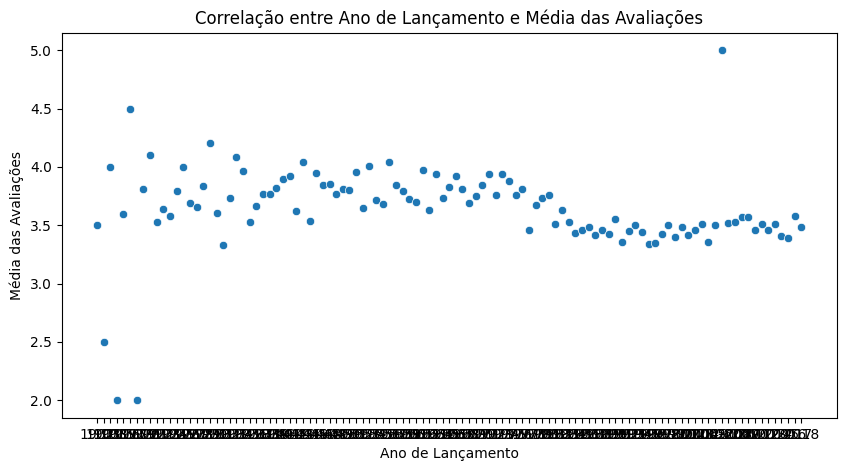

In [16]:
# (a) Correlação entre ano de lançamento e avaliação média
avg_ratings_per_year = movie_ratings.groupby("year")["rating"].mean()
plt.figure(figsize=(10, 5))
sns.scatterplot(x=avg_ratings_per_year.index, y=avg_ratings_per_year.values)
plt.xlabel("Ano de Lançamento")
plt.ylabel("Média das Avaliações")
plt.title("Correlação entre Ano de Lançamento e Média das Avaliações")
plt.show()

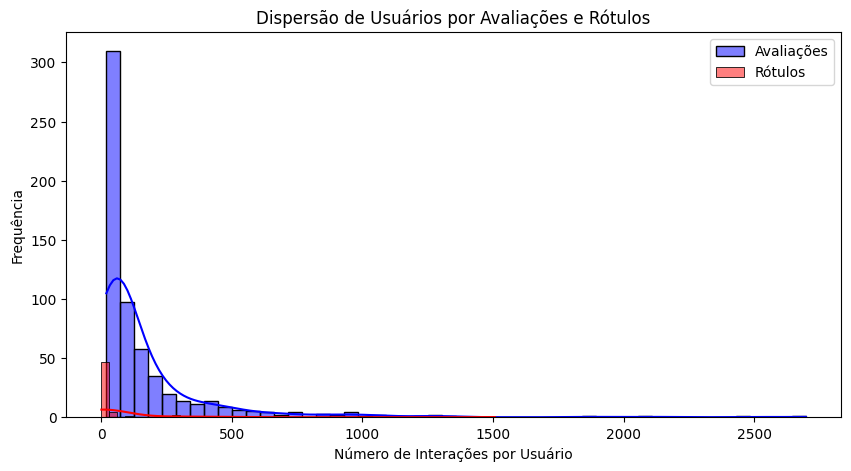

In [17]:
# (b) Dispersão entre usuários que avaliaram e usuários que rotularam filmes
num_ratings_per_user = ratings["userId"].value_counts()
num_tags_per_user = tags["userId"].value_counts()

plt.figure(figsize=(10, 5))
sns.histplot(num_ratings_per_user, bins=50, kde=True, color='blue', label='Avaliações')
sns.histplot(num_tags_per_user, bins=50, kde=True, color='red', label='Rótulos')
plt.xlabel("Número de Interações por Usuário")
plt.ylabel("Frequência")
plt.title("Dispersão de Usuários por Avaliações e Rótulos")
plt.legend()
plt.show()

<ipython-input-18-86014ada6a32>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tags.values, y=top_tags.index, palette='viridis')


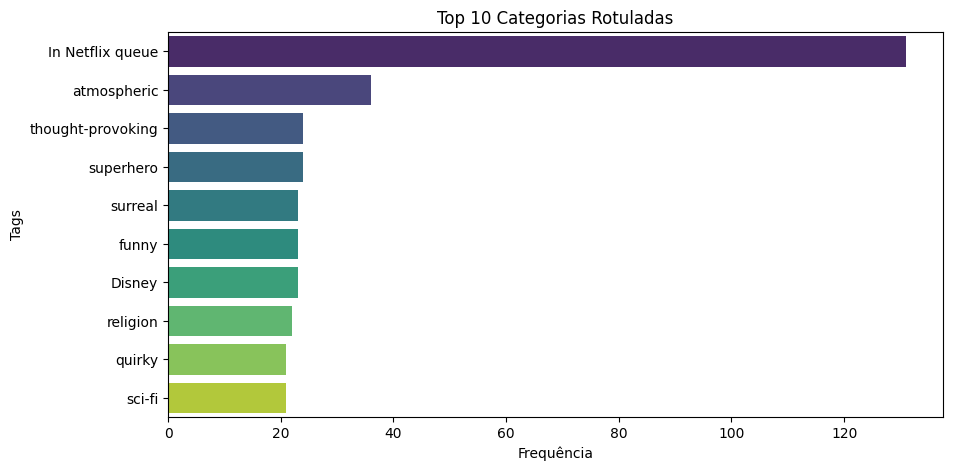

In [18]:
# (c) Categoria rotulada mais frequente
top_tags = tags["tag"].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_tags.values, y=top_tags.index, palette='viridis')
plt.xlabel("Frequência")
plt.ylabel("Tags")
plt.title("Top 10 Categorias Rotuladas")
plt.show()

<ipython-input-19-0176b1f60c02>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ratings_by_time = ratings.set_index("timestamp").resample("M")["rating"].mean()


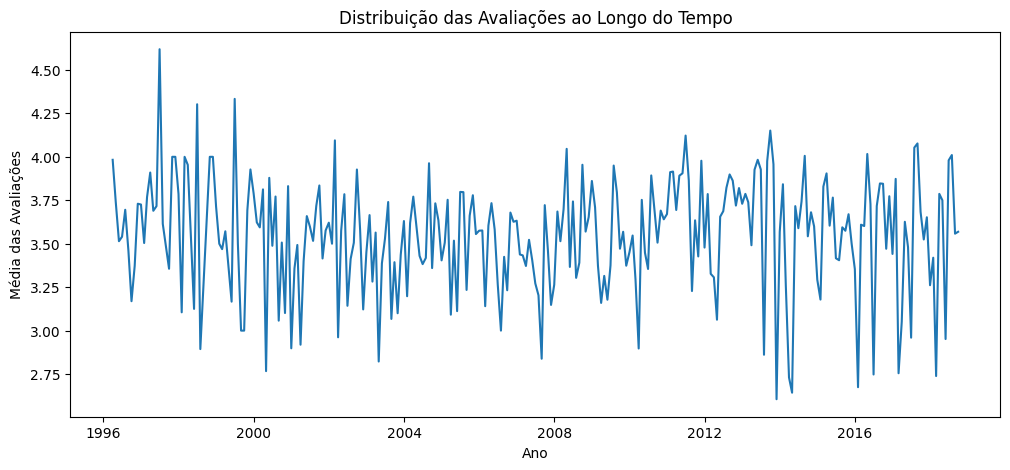

In [19]:
# (d) Distribuição das avaliações ao longo do tempo
ratings["timestamp"] = pd.to_datetime(ratings["timestamp"], unit='s')
ratings_by_time = ratings.set_index("timestamp").resample("M")["rating"].mean()
plt.figure(figsize=(12, 5))
sns.lineplot(data=ratings_by_time)
plt.xlabel("Ano")
plt.ylabel("Média das Avaliações")
plt.title("Distribuição das Avaliações ao Longo do Tempo")
plt.show()

# Questão 2


Pergunta 1 tabela movies:

Quais são os 10 gêneros mais frequentes nos filmes?

<ipython-input-48-0ded7411065b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.head(10).values, y=genre_counts.head(10).index, palette="plasma")


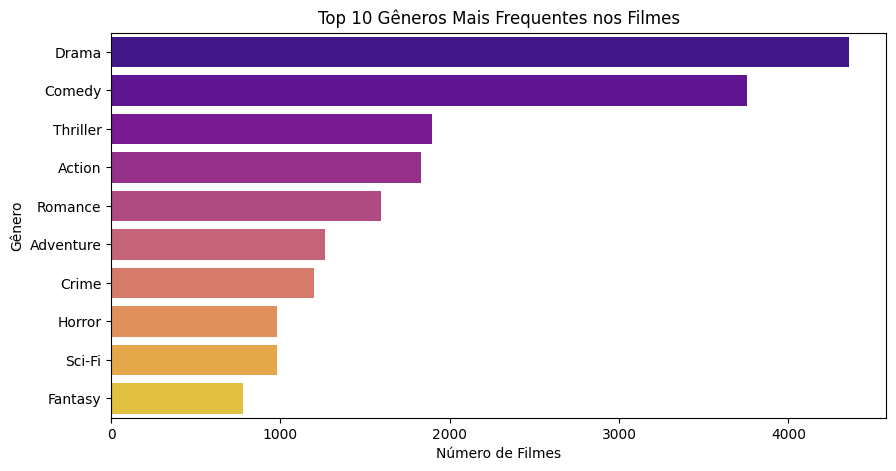

In [48]:
# Explodir os gêneros em linhas separadas
genre_counts = movies["genres"].str.split('|').explode().value_counts()

# Remover a entrada '(no genres listed)' se existir
genre_counts = genre_counts[genre_counts.index != "(no genres listed)"]

# Visualização
plt.figure(figsize=(10, 5))
sns.barplot(x=genre_counts.head(10).values, y=genre_counts.head(10).index, palette="plasma")
plt.xlabel("Número de Filmes")
plt.ylabel("Gênero")
plt.title("Top 10 Gêneros Mais Frequentes nos Filmes")
plt.show()
genre_counts = genre_counts[genre_counts.index != "(no genres listed)"]



 Pergunta 2:

 Quais filmes estão sem gênero?

In [49]:
no_genre_movies = movies[movies["genres"] == "(no genres listed)"]
print(f"(2.extra) Filmes sem gênero: {len(no_genre_movies)}")

(2.extra) Filmes sem gênero: 26


Pergunta 1 tabela tags:

Qual é a tag mais frequentemente utilizada pelos usuários ao rotular filmes no dataset?

In [26]:
top_tags = tags["tag"].value_counts().head(10)
print(top_tags.index[0])

In Netflix queue


Pergunta 2:

Qual usuário aplicou o maior número de tags e quantas tags ele usou?


In [28]:
num_tags_per_user = tags["userId"].value_counts()

top_user = num_tags_per_user.idxmax()
num_tags = num_tags_per_user.max()
print(f"O usuário {top_user} aplicou {num_tags} tags.")

O usuário 474 aplicou 1507 tags.


Pergunta 1 tabela links:

Como o dataset links.csv pode ser útil em análises externas e o que ele traz de informação complementar?

Resposta:

O links.csv faz a ponte entre o ID interno dos filmes no MovieLens (movieId) e seus equivalentes nos bancos de dados do IMDb (imdbId) e do TMDB (tmdbId)

Pergunta 2:

Todos os filmes presentes na base movies.csv possuem correspondência nos bancos externos (IMDb e TMDB)?

In [29]:
merged = movies.merge(links, on="movieId", how="left")
missing_links = merged[merged["imdbId"].isna() | merged["tmdbId"].isna()]
print(f"Número de filmes sem link externo: {len(missing_links)}")

Número de filmes sem link externo: 7


Pergunta 1 tabela ratings:

Qual é a distribuição geral das avaliações? Há alguma nota que os usuários tendem a dar mais frequentemente?

<ipython-input-31-c80204daef2f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data=ratings, palette="magma")


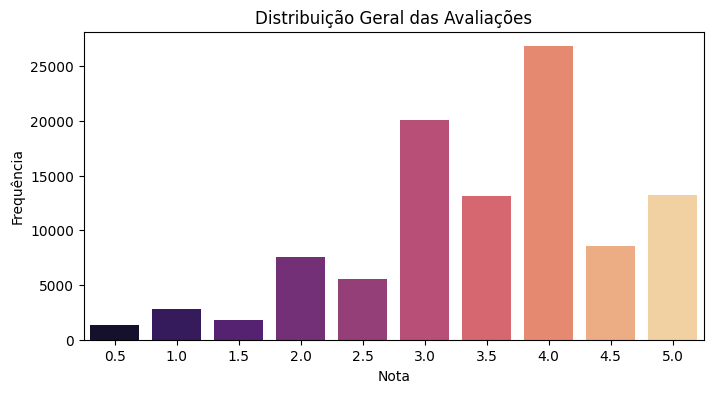

In [31]:
# Distribuição geral das avaliações
plt.figure(figsize=(8, 4))
sns.countplot(x="rating", data=ratings, palette="magma")
plt.title("Distribuição Geral das Avaliações")
plt.xlabel("Nota")
plt.ylabel("Frequência")
plt.show()



Resposta:


A partir do gráfico, podemos observar quais notas são mais frequentes.
É comum que notas entre 3.0 e 4.0 sejam mais dadas, indicando uma tendência positiva nas avaliações.

Pergunta 2:

Qual usuário deu mais avaliações no total? E quantas ele deu?

O usuário mais ativo foi o ID 414, com 2698 avaliações feitas.


<ipython-input-32-80dc8657eaa0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.index.astype(str), y=top_users.values, palette="crest")


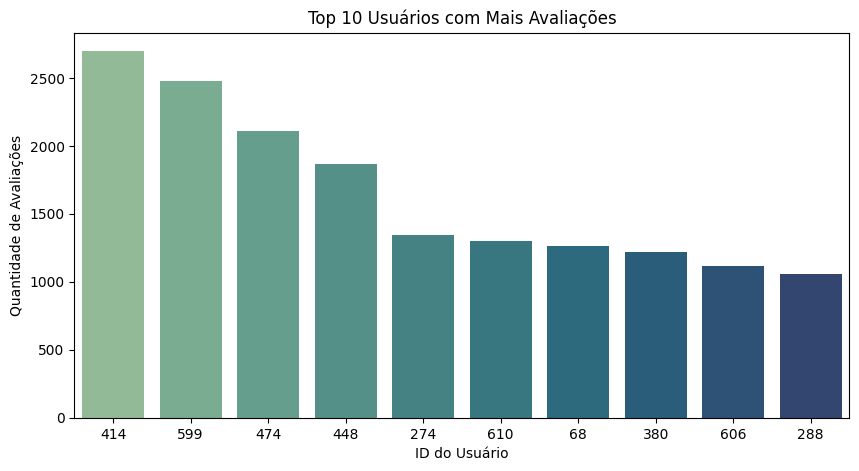

In [32]:
# Usuário com maior número de avaliações
most_active_user = ratings["userId"].value_counts().idxmax()
most_ratings = ratings["userId"].value_counts().max()

print(f"O usuário mais ativo foi o ID {most_active_user}, com {most_ratings} avaliações feitas.")

# Também podemos visualizar os top 10 usuários mais ativos
top_users = ratings["userId"].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_users.index.astype(str), y=top_users.values, palette="crest")
plt.xlabel("ID do Usuário")
plt.ylabel("Quantidade de Avaliações")
plt.title("Top 10 Usuários com Mais Avaliações")
plt.show()

Resposta:

O usuário mais ativo foi o ID 414, com 2698 avaliações feitas.